## 1. Chargement et exploration des données

Le jeu de données utilisé provient de la plateforme data.gouv.fr et contient des statistiques de délinquance enregistrée par la police et la gendarmerie nationales.  
Chaque ligne correspond à une observation agrégée à une échelle géographique donnée (commune), pour un indicateur et une année donnés.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
# Charger la donnée RAW (une seule fois)
df = pd.read_csv("Data/communes_raw.csv", sep=";", low_memory=False)

df.shape
df.head(20)


,CODGEO_2025,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,est_diffuse,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime,complement_info_nombre,complement_info_taux
0,01001,2016,Violences physiques intrafamiliales,Victime,0.0,"0,0000000",diff,767,2016,348,2016,NaN,NaN
1,01001,2016,Violences physiques hors cadre familial,Victime,NaN,NaN,ndiff,767,2016,348,2016,"1,3620690","0,9598386"
2,01001,2016,Violences sexuelles,Victime,0.0,"0,0000000",diff,767,2016,348,2016,NaN,NaN
3,01001,2016,Vols avec armes,Infraction,0.0,"0,0000000",diff,767,2016,348,2016,NaN,NaN
4,01001,2016,Vols violents sans arme,Infraction,0.0,"0,0000000",diff,767,2016,348,2016,NaN,NaN
5,01001,2016,Vols sans violence contre des personnes,Victime entendue,NaN,NaN,ndiff,767,2016,348,2016,"2,0273973","2,2174361"
6,01001,2016,Cambriolages de logement,Infraction,NaN,NaN,ndiff,767,2016,348,2016,"2,7745455","6,6964780"
7,01001,2016,Vols de véhicule,Véhicule,NaN,NaN,ndiff,767,2016,348,2016,"1,9781022","1,6551488"
8,01001,2016,Vols dans les véhicules,Véhicule,0.0,"0,0000000",diff,767,2016,348,2016,NaN,NaN
9,01001,2016,Vols d'accessoires sur véhicules,Véhicule,NaN,NaN,ndiff,767,2016,348,2016,"1,7905138","1,2873122"


## 1.1. Vue d’ensemble du jeu de données

Cette étape vise à comprendre la taille et la structure générale du jeu de données avant toute manipulation.  
Nous examinons le nombre d’observations, le nombre de variables ainsi que les premiers exemples de données.


In [ ]:

df.shape #  Vérifie la taille et la structure du jeu de données
df.info()  #  Permets de comprendre les types de variables et leur contenu
df.describe() #  Obtenir des statistiques de base pour les variables numériques
df.isna().sum().sort_values(ascending=False) #  Identifier les colonnes problématiques avec beaucoup de valeurs manquantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714200 entries, 0 to 4714199
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   CODGEO_2025             object 
 1   annee                   int64  
 2   indicateur              object 
 3   unite_de_compte         object 
 4   nombre                  float64
 5   taux_pour_mille         object 
 6   est_diffuse             object 
 7   insee_pop               int64  
 8   insee_pop_millesime     int64  
 9   insee_log               int64  
 10  insee_log_millesime     int64  
 11  complement_info_nombre  object 
 12  complement_info_taux    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 467.6+ MB


complement_info_nombre    2539786
complement_info_taux      2539786
taux_pour_mille           2175177
nombre                    2174414
CODGEO_2025                     0
annee                           0
indicateur                      0
unite_de_compte                 0
est_diffuse                     0
insee_pop                       0
insee_pop_millesime             0
insee_log                       0
insee_log_millesime             0
dtype: int64

Le jeu de données initial contient 4,7 million d’observations et 13 variables.
Certaines variables sont numériques, catégorielles et binaires, et des valeurs spécifiques sont utilisées pour représenter des informations manquantes.

## 1.2. Structure et types des variables

L’analyse des types de variables permet d’identifier :
- les variables numériques (mesures, effectifs),
- les variables catégorielles (types d’infractions, unités),
- les identifiants (codes géographiques),
- les variables temporelles.

Cette étape est essentielle pour détecter d’éventuelles incohérences de typage.


In [ ]:
# Ce code permets de diagnostiquer la présence de doublons dans les données
# nettoyer le DataFrame en supprimant les lignes répétées
# améliorer la qualité des données en garantissant que chaque observation est unique
# éviter les biais dans les analyses statistiques ou les visualisations


df.duplicated().sum()
df = df.drop_duplicates()


## 1.3. Analyse des valeurs manquantes

Nous analysons la présence de valeurs manquantes dans le jeu de données.  
Cette étape permet d’identifier les variables nécessitant un traitement spécifique lors de la phase de nettoyage.


In [ ]:
df.isna().sum() # Prépare les étapes de nettoyage (imputation, suppression ou traitement spécifique)



CODGEO_2025                     0
annee                           0
indicateur                      0
unite_de_compte                 0
nombre                    2174414
taux_pour_mille           2175177
est_diffuse                     0
insee_pop                       0
insee_pop_millesime             0
insee_log                       0
insee_log_millesime             0
complement_info_nombre    2539786
complement_info_taux      2539786
dtype: int64

## 1.4. Analyse descriptive des variables numériques

Nous étudions les statistiques descriptives des variables numériques (minimum, maximum, moyenne, médiane).  
L’objectif est de vérifier la cohérence des ordres de grandeur et d’identifier d’éventuelles valeurs extrêmes.


In [ ]:
df.describe() # Donne une vue d’ensemble des variables numériques
              # Permet de détecter les ordres de grandeur, les valeurs extrêmes et la dispersion
              # Sert de base pour identifier des anomalies ou préparer des visualisations



,annee,nombre,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
count,4.714200e+06,2.539786e+06,4.714200e+06,4.714200e+06,4.714200e+06,4.714200e+06
mean,2.020000e+03,1.102304e+01,2.032030e+03,2.019665e+03,1.112520e+03,2.019332e+03
std,2.581989e+00,2.824093e+02,1.541028e+04,2.160522e+00,9.457096e+03,1.826023e+00
min,2.016000e+03,0.000000e+00,0.000000e+00,2.016000e+03,0.000000e+00,2.016000e+03
25%,2.018000e+03,0.000000e+00,1.980000e+02,2.018000e+03,1.200000e+02,2.018000e+03
50%,2.020000e+03,0.000000e+00,4.600000e+02,2.020000e+03,2.540000e+02,2.020000e+03
75%,2.022000e+03,0.000000e+00,1.170000e+03,2.022000e+03,6.170000e+02,2.021000e+03
max,2.024000e+03,1.623780e+05,2.190327e+06,2.022000e+03,1.396753e+06,2.021000e+03


In [ ]:
df.describe(percentiles=[0.01, 0.99]) # Enrichit l'analyse descriptive


,annee,nombre,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
count,4.714200e+06,2.539786e+06,4.714200e+06,4.714200e+06,4.714200e+06,4.714200e+06
mean,2.020000e+03,1.102304e+01,2.032030e+03,2.019665e+03,1.112520e+03,2.019332e+03
std,2.581989e+00,2.824093e+02,1.541028e+04,2.160522e+00,9.457096e+03,1.826023e+00
min,2.016000e+03,0.000000e+00,0.000000e+00,2.016000e+03,0.000000e+00,2.016000e+03
1%,2.016000e+03,0.000000e+00,3.300000e+01,2.016000e+03,2.500000e+01,2.016000e+03
50%,2.020000e+03,0.000000e+00,4.600000e+02,2.020000e+03,2.540000e+02,2.020000e+03
99%,2.024000e+03,1.740000e+02,2.826500e+04,2.022000e+03,1.426500e+04,2.021000e+03
max,2.024000e+03,1.623780e+05,2.190327e+06,2.022000e+03,1.396753e+06,2.021000e+03


## 1.5. Analyse des variables catégorielles

Cette étape permet d’identifier les différentes modalités présentes dans les variables catégorielles, ainsi que leur fréquence.  
Elle facilite la compréhension de la structure des indicateurs et des unités de compte.


In [ ]:
df["indicateur"].value_counts().head(10) # Identifier les indicateurs les plus représentés dans le jeu de données
                                         # Vérifier la distribution des unités de compte utilisées
                                         # Détecter d’éventuelles incohérences ou déséquilibres dans les données



indicateur
Violences physiques intrafamiliales        314280
Violences physiques hors cadre familial    314280
Violences sexuelles                        314280
Vols avec armes                            314280
Vols violents sans arme                    314280
Vols sans violence contre des personnes    314280
Cambriolages de logement                   314280
Vols de véhicule                           314280
Vols dans les véhicules                    314280
Vols d'accessoires sur véhicules           314280
Name: count, dtype: int64

In [ ]:
df["unite_de_compte"].value_counts() 

unite_de_compte
Victime             1257120
Infraction          1257120
Véhicule             942840
Mis en cause         942840
Victime entendue     314280
Name: count, dtype: int64

La variable `unite_de_compte` a été utilisée à des fins de contrôle afin de vérifier la cohérence méthodologique des indicateurs.


In [9]:
df.groupby("indicateur")["unite_de_compte"].nunique().sort_values(ascending=False)


indicateur
Cambriolages de logement                          1
Destructions et dégradations volontaires          1
Escroqueries et fraudes aux moyens de paiement    1
Trafic de stupéfiants                             1
Usage de stupéfiants                              1
Usage de stupéfiants (AFD)                        1
Violences physiques hors cadre familial           1
Violences physiques intrafamiliales               1
Violences sexuelles                               1
Vols avec armes                                   1
Vols d'accessoires sur véhicules                  1
Vols dans les véhicules                           1
Vols de véhicule                                  1
Vols sans violence contre des personnes           1
Vols violents sans arme                           1
Name: unite_de_compte, dtype: int64

## 1.6. Analyse temporelle préliminaire

Nous examinons la répartition des données selon la variable temporelle afin de vérifier :
- la couverture temporelle du jeu de données,
- la continuité des années disponibles.


In [ ]:
df["annee"].value_counts().sort_index() #  Vérifier la répartition des données par année


annee
2016    523800
2017    523800
2018    523800
2019    523800
2020    523800
2021    523800
2022    523800
2023    523800
2024    523800
Name: count, dtype: int64

## 1.7. Analyse géographique

Le jeu de données utilise un code géographique (code INSEE) pour identifier les communes.  
Nous vérifions le nombre de territoires distincts (communes) et la cohérence de cette clé géographique, qui sera utilisée ultérieurement pour des jointures avec des référentiels officiels.


In [ ]:
df["CODGEO_2025"].nunique() # Compte le nombre de distinctes présentes dans le jeu de données




34920

## 1.8. Détection des doublons

Nous vérifions l’existence éventuelle de doublons stricts dans le jeu de données.  
Même en l’absence de doublons, cette vérification fait partie des bonnes pratiques en data management.


In [ ]:
df.duplicated().sum() # Identifie le nombr etotal de doublon dans le dataframe


np.int64(0)

## 1.9. Relations simples entre variables

Des agrégations simples sont réalisées afin d’observer les relations générales entre certaines variables (par exemple, évolution dans le temps ou différences entre indicateurs).  
Cette analyse reste strictement descriptive.


In [ ]:
df.groupby("annee")["nombre"].mean()  # Identifie le nombr etotal de doublon dans le dataframe
                                      # calcule la médiane de la colonne nombre pour chaque indicateur


annee
2016    10.537257
2017    10.593423
2018    10.486150
2019    10.860585
2020     9.618396
2021    10.685503
2022    11.843770
2023    12.251979
2024    12.431662
Name: nombre, dtype: float64

In [ ]:
df.groupby("indicateur")["nombre"].median() 

indicateur
Cambriolages de logement                           0.0
Destructions et dégradations volontaires          10.0
Escroqueries et fraudes aux moyens de paiement     6.0
Trafic de stupéfiants                              0.0
Usage de stupéfiants                               0.0
Usage de stupéfiants (AFD)                         0.0
Violences physiques hors cadre familial            0.0
Violences physiques intrafamiliales                0.0
Violences sexuelles                                0.0
Vols avec armes                                    0.0
Vols d'accessoires sur véhicules                   0.0
Vols dans les véhicules                            0.0
Vols de véhicule                                   0.0
Vols sans violence contre des personnes            0.0
Vols violents sans arme                            0.0
Name: nombre, dtype: float64

La médiane du nombre de faits est faible pour la majorité des indicateurs, ce qui reflète la forte hétérogénéité territoriale et la prédominance de faibles effectifs à l’échelle communale

### Exploration des indicateurs

Avant de poursuivre les analyses, un inventaire des différents types d’indicateurs présents dans le jeu de données est réalisé afin de mieux comprendre la diversité des phénomènes observés.


In [ ]:
df["indicateur"].nunique() # Compte le nombre d’indicateurs distincts présents dans le jeu de données


15

In [ ]:
df["indicateur"].value_counts() # Compte le nombre d’occurrences de chaque type d'indicateur
                                # Identifie les indicateurs les plus fréquents

indicateur
Violences physiques intrafamiliales               314280
Violences physiques hors cadre familial           314280
Violences sexuelles                               314280
Vols avec armes                                   314280
Vols violents sans arme                           314280
Vols sans violence contre des personnes           314280
Cambriolages de logement                          314280
Vols de véhicule                                  314280
Vols dans les véhicules                           314280
Vols d'accessoires sur véhicules                  314280
Destructions et dégradations volontaires          314280
Usage de stupéfiants                              314280
Usage de stupéfiants (AFD)                        314280
Trafic de stupéfiants                             314280
Escroqueries et fraudes aux moyens de paiement    314280
Name: count, dtype: int64

## 1.10. Conclusion de l’analyse exploratoire

L’analyse exploratoire a permis de :
- comprendre la structure du jeu de données,
- identifier les variables clés pour l’analyse,
- mettre en évidence des points nécessitant un nettoyage (types de variables, valeurs manquantes).

Cette étape constitue la base des phases suivantes : nettoyage, enrichissement par jointure et analyse approfondie.


## 2. Nettoyage et préparation des données

À partir des constats réalisés lors de l’analyse exploratoire, cette section présente les étapes de nettoyage mises en œuvre afin d’obtenir un jeu de données cohérent, exploitable et adapté aux analyses descriptives et aux visualisations.


In [ ]:
df_clean = df.copy() # Création d'une copie indépendante du dataframe df


### 2.1 Correction des types de variables

Cette étape vise à s’assurer que chaque variable possède un type cohérent avec sa signification (identifiant, variable numérique ou catégorielle).


In [18]:
df_clean["CODGEO_2025"] = df_clean["CODGEO_2025"].astype(str)
#Le code géographique est un identifiant administratif et non une variable quantitative

In [19]:
df_clean = df_clean.drop(
    columns=["complement_info_nombre", "complement_info_taux"]
)


Les colonnes `complement_info_nombre` et `complement_info_taux` fournissent des informations méthodologiques sur la diffusion des données. 
Elles ne sont pas exploitées dans le cadre de cette analyse descriptive et ont été retirées afin de simplifier le jeu de données.


La variable `taux_pour_mille`, initialement stockée sous forme de chaîne de caractères, est convertie en variable numérique afin de permettre son exploitation statistique.




In [ ]:
# Uniformise le format des décimales (virgule en point)
# Convertit les chaînes en valeurs numériques exploitables
# Gère les erreurs de conversion en les transformant en NAN

df_clean["taux_pour_mille"] = (
    df_clean["taux_pour_mille"]
    .str.replace(",", ".", regex=False)
)

df_clean["taux_pour_mille"] = pd.to_numeric(
    df_clean["taux_pour_mille"],
    errors="coerce"
)


Les variables catégorielles sont explicitement typées afin d’éviter toute interprétation numérique incorrecte.


In [ ]:
# Convertit les colonnes qualitatives (indicateur, unite_de_compte) en type category pour optimiser la mémoire
# accélérer les traitements et clarifier qu’il s’agit de variables catégorielles

cat_cols = ["indicateur", "unite_de_compte"]
df_clean[cat_cols] = df_clean[cat_cols].astype("category")


(a conserver ) La variable `est_diffuse`, relative aux règles de diffusion statistique, n’est pas exploitée dans le cadre de cette analyse descriptive. Elle est supprimée afin de simplifier le jeu de données.


In [22]:
#df_clean = df_clean.drop(columns=["est_diffuse"])


Les valeurs manquantes sont conservées lorsque leur absence peut résulter de règles de diffusion statistique ou lorsque leur imputation pourrait introduire un biais.


In [ ]:
df_clean.isna().sum().sort_values(ascending=False) # Compte les valeurs manquantes par colonne et les classe par ordre décroissant pour identifier rapidement les variables les plus affectées


taux_pour_mille        2175177
nombre                 2174414
CODGEO_2025                  0
annee                        0
indicateur                   0
unite_de_compte              0
est_diffuse                  0
insee_pop                    0
insee_pop_millesime          0
insee_log                    0
insee_log_millesime          0
dtype: int64

Une vérification des doublons stricts a été réalisée afin de garantir l’unicité des observations.


In [ ]:
df_clean.duplicated().sum() # Compte le nombre de le nombre de doublon dans le dataframe nettoyé



np.int64(0)

In [ ]:
(df_clean["nombre"] < 0).sum() # Compte les valeurs incohérentes




np.int64(0)

Aucune valeur négative n’a été observée pour la variable `nombre`, ce qui confirme la cohérence des données.


In [ ]:
(df_clean["insee_pop"] <= 0).sum() # Compte les valeurs incohérentes


np.int64(810)

Certaines observations présentent une population nulle ou non renseignée. Ces lignes sont conservées dans le jeu de données, mais exclues des calculs de taux afin d’éviter toute division par zéro et toute interprétation erronée.


### 2.2 Gestion des populations nulles ou non renseignées

Certaines observations présentent une population nulle ou non renseignée (`insee_pop <= 0`).  
Ces lignes sont conservées dans le jeu de données brut, mais exclues des calculs de taux afin d’éviter toute division par zéro et toute interprétation erronée.


In [27]:
# Masque des lignes avec une population exploitable
mask_pop_ok = df_clean["insee_pop"] > 0

# Création d'un sous-ensemble pour l'analyse des taux
df_analysis = df_clean[mask_pop_ok].copy()

# Vérification du nombre de lignes exclues
nb_exclues = (~mask_pop_ok).sum()
nb_exclues


np.int64(810)

### 2.3 Recalcul du taux pour mille

Afin de disposer d’un indicateur cohérent et directement exploitable, le taux pour mille est recalculé à partir du nombre de faits et de la population, en ne conservant que les lignes pour lesquelles la population est strictement positive.


In [ ]:
# Ajoute une colonne calculée qui exprime le nombre d’événements par 1000 habitants, 
# permettant une comparaison normalisée entre communes ou années

df_analysis["taux_calcule_pour_mille"] = (
    df_analysis["nombre"] / df_analysis["insee_pop"] * 1000
)


### 2.4 Validation du jeu de données nettoyé

Une dernière vérification est effectuée afin de s’assurer que les types de variables et les valeurs manquantes sont cohérents après les opérations de nettoyage.


In [ ]:
# Diagnostique la structure et la qualité des données dans df_clean et df_analysis :structure, typage et non-nullité
# nombre de valeurs manquantes par colonne

df_clean.info()
df_clean.isna().sum().sort_values(ascending=False).head(10)

df_analysis.info()
df_analysis.isna().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714200 entries, 0 to 4714199
Data columns (total 11 columns):
 #   Column               Dtype   
---  ------               -----   
 0   CODGEO_2025          object  
 1   annee                int64   
 2   indicateur           category
 3   unite_de_compte      category
 4   nombre               float64 
 5   taux_pour_mille      float64 
 6   est_diffuse          object  
 7   insee_pop            int64   
 8   insee_pop_millesime  int64   
 9   insee_log            int64   
 10  insee_log_millesime  int64   
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 332.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 4713390 entries, 0 to 4714199
Data columns (total 12 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   CODGEO_2025              object  
 1   annee                    int64   
 2   indicateur               category
 3   unite_de_compte          category
 4   nombre  

nombre                     2174367
taux_pour_mille            2174367
taux_calcule_pour_mille    2174367
CODGEO_2025                      0
annee                            0
indicateur                       0
unite_de_compte                  0
est_diffuse                      0
insee_pop                        0
insee_pop_millesime              0
dtype: int64

## 2.5. Création de variables dérivées

À partir du jeu de données nettoyé, un sous-ensemble est utilisé pour l’analyse, en ne conservant que les observations pour lesquelles la population est strictement positive.


In [ ]:
# crée un nouveau DataFrame (df_analysis) contenant uniquement les lignes avec une population strictement positive, pour garantir la cohérence des calculs
df_analysis = df_clean[df_clean["insee_pop"] > 0].copy()


In [31]:
# Sous-ensemble pour l'analyse (population exploitable)
df_analysis = df_clean[df_clean["insee_pop"] > 0].copy()

print("Nombre de lignes df_clean :", len(df_clean))
print("Nombre de lignes df_analysis :", len(df_analysis))


Nombre de lignes df_clean : 4714200
Nombre de lignes df_analysis : 4713390


### 2.5.1 Recalcul du taux pour mille

Le taux pour mille est recalculé à partir du nombre de faits et de la population afin de disposer d’un indicateur homogène et directement exploitable pour les analyses.


In [ ]:
# Ajoute une colonne calculée (taux pour mille habitants) qui exprime le nombre d’événements par 1000 habitants

df_analysis["taux_calcule_pour_mille"] = (
    df_analysis["nombre"] / df_analysis["insee_pop"] * 1000
)


### 2.5.2 Évolution annuelle du taux

Une variable d’évolution annuelle est créée afin de mesurer la variation du taux pour mille d’une année à l’autre, pour un territoire et un indicateur donnés.


In [33]:
# Tri indispensable avant le calcul des différences
df_analysis = df_analysis.sort_values(
    ["CODGEO_2025", "indicateur", "annee"]
)

df_analysis["evolution_annuelle"] = (
    df_analysis
    .groupby(["CODGEO_2025", "indicateur"])["taux_calcule_pour_mille"]
    .diff()
)


/var/folders/lq/12fzlg457fvcn5331txcwkdr0000gn/T/ipykernel_52464/3790909716.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["CODGEO_2025", "indicateur"])["taux_calcule_pour_mille"]


### 2.5.3 Classe de taille de commune

Les communes sont regroupées en classes de population afin de faciliter les comparaisons et de limiter l’instabilité des taux pour les territoires de petite taille.


In [ ]:
# Classe les communes en catégories de taille démographique (petites, moyennes, grandes)

df_analysis["taille_commune"] = pd.cut(
    df_analysis["insee_pop"],
    bins=[0, 1000, 5000, 20000, 100000, df_analysis["insee_pop"].max()],
    labels=["<1k", "1k–5k", "5k–20k", "20k–100k", ">100k"]
)


### 2.5.4 Indicateur de logements par habitant

Un indicateur de logements par habitant est calculé afin de disposer d’une mesure simple du niveau d’urbanisation des territoires.


In [ ]:
# Ajoute une colonne calculée qui mesure la disponibilité des logements par habitant
df_analysis["logements_par_habitant"] = (
    df_analysis["insee_log"] / df_analysis["insee_pop"]
)


### 2.5.5 Niveau de délinquance (variable catégorielle)

Le taux pour mille est discrétisé en niveaux de délinquance afin de faciliter l’interprétation et la visualisation des résultats.


In [ ]:
# Ajoute une variable catégorielle qui classe les communes en quatre niveaux de délinquance (Faible, Modéré, Élevé, Très élevé)

df_analysis["niveau_delinquance"] = pd.cut(
    df_analysis["taux_calcule_pour_mille"],
    bins=[0, 5, 10, 20, df_analysis["taux_calcule_pour_mille"].max()],
    labels=["Faible", "Modéré", "Élevé", "Très élevé"]
)


In [ ]:
#  Retourne un nouveau DataFrame contenant uniquement ces colonnes citées


df_analysis[
    [
        "CODGEO_2025",
        "annee",
        "indicateur",
        "nombre",
        "taux_calcule_pour_mille",
        "evolution_annuelle",
        "taille_commune",
        "logements_par_habitant",
        "niveau_delinquance"
    ]
].head(-20)


,CODGEO_2025,annee,indicateur,nombre,taux_calcule_pour_mille,evolution_annuelle,taille_commune,logements_par_habitant,niveau_delinquance
6,01001,2016,Cambriolages de logement,NaN,NaN,NaN,<1k,0.453716,NaN
523806,01001,2017,Cambriolages de logement,NaN,NaN,NaN,<1k,0.456186,NaN
1047606,01001,2018,Cambriolages de logement,NaN,NaN,NaN,<1k,0.459144,NaN
1571406,01001,2019,Cambriolages de logement,NaN,NaN,NaN,<1k,0.462131,NaN
2095206,01001,2020,Cambriolages de logement,NaN,NaN,NaN,<1k,0.454094,NaN
...,...,...,...,...,...,...,...,...,...
1571392,97617,2018,Vols de véhicule,14.0,1.004737,0.000000,5k–20k,0.277881,Faible
2095192,97617,2019,Vols de véhicule,14.0,1.004737,0.000000,5k–20k,0.277881,Faible
2618992,97617,2020,Vols de véhicule,20.0,1.435338,0.430601,5k–20k,0.277881,Faible
3142792,97617,2021,Vols de véhicule,17.0,1.220037,-0.215301,5k–20k,0.277881,Faible


### 2.5.6 Regroupement des indicateurs en grandes catégories

Afin de faciliter la lecture des analyses globales, les indicateurs détaillés sont regroupés en grandes catégories thématiques. Le niveau de détail initial est conservé pour les analyses fines.


In [ ]:
# Création de dictionnaire categories

dict_categories = {
    # Atteintes aux biens
    "Cambriolages de logement": "Atteintes aux biens",
    "Destructions et dégradations volontaires": "Atteintes aux biens",
    "Vols d'accessoires sur véhicules": "Atteintes aux biens",
    "Vols dans les véhicules": "Atteintes aux biens",
    "Vols de véhicule": "Atteintes aux biens",

    # Vols contre les personnes
    "Vols sans violence contre des personnes": "Atteintes aux personnes",
    "Vols violents sans arme": "Atteintes aux personnes",
    "Vols avec armes": "Atteintes aux personnes",

    # Violences
    "Violences physiques hors cadre familial": "Violences",
    "Violences physiques intrafamiliales": "Violences",
    "Violences sexuelles": "Violences",

    # Stupéfiants
    "Usage de stupéfiants": "Stupéfiants",
    "Usage de stupéfiants (AFD)": "Stupéfiants",
    "Trafic de stupéfiants": "Stupéfiants",

    # Infractions économiques
    "Escroqueries et fraudes aux moyens de paiement": "Infractions économiques"
}


In [ ]:
#  Ajoute une colonne catégorielle qui regroupe chaque indicateur détaillé 
# dans une grande famille thématique (biens, personnes, violences, stupéfiants, infractions économiques)

df_analysis["categorie_indicateur"] = df_analysis["indicateur"].map(dict_categories)


In [40]:
df_analysis.head(20)

,CODGEO_2025,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,est_diffuse,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime,taux_calcule_pour_mille,evolution_annuelle,taille_commune,logements_par_habitant,niveau_delinquance,categorie_indicateur
6,01001,2016,Cambriolages de logement,Infraction,NaN,NaN,ndiff,767,2016,348,2016,NaN,NaN,<1k,0.453716,NaN,Atteintes aux biens
523806,01001,2017,Cambriolages de logement,Infraction,NaN,NaN,ndiff,776,2017,354,2017,NaN,NaN,<1k,0.456186,NaN,Atteintes aux biens
1047606,01001,2018,Cambriolages de logement,Infraction,NaN,NaN,ndiff,771,2018,354,2018,NaN,NaN,<1k,0.459144,NaN,Atteintes aux biens
1571406,01001,2019,Cambriolages de logement,Infraction,NaN,NaN,ndiff,779,2019,360,2019,NaN,NaN,<1k,0.462131,NaN,Atteintes aux biens
2095206,01001,2020,Cambriolages de logement,Infraction,NaN,NaN,ndiff,806,2020,366,2020,NaN,NaN,<1k,0.454094,NaN,Atteintes aux biens
2619006,01001,2021,Cambriolages de logement,Infraction,NaN,NaN,ndiff,832,2021,372,2021,NaN,NaN,<1k,0.447115,NaN,Atteintes aux biens
3142806,01001,2022,Cambriolages de logement,Infraction,NaN,NaN,ndiff,859,2022,372,2021,NaN,NaN,<1k,0.433062,NaN,Atteintes aux biens
3666606,01001,2023,Cambriolages de logement,Infraction,NaN,NaN,ndiff,859,2022,372,2021,NaN,NaN,<1k,0.433062,NaN,Atteintes aux biens
4190406,01001,2024,Cambriolages de logement,Infraction,NaN,NaN,ndiff,859,2022,372,2021,NaN,NaN,<1k,0.433062,NaN,Atteintes aux biens
10,01001,2016,Destructions et dégradations volontaires,Infraction,NaN,NaN,ndiff,767,2016,348,2016,NaN,NaN,<1k,0.453716,NaN,Atteintes aux biens


## 2.6 Enrichissement géographique

Le jeu de données est enrichi par une jointure avec un référentiel des communes françaises, afin d’ajouter les noms de communes, de départements et de régions correspondant aux codes géographiques (`CODGEO_2025`).


In [41]:
# Chargement du référentiel communes / départements / régions
path_ref = "Data/referentiel_communes_insee.csv"

communes_ref = pd.read_csv(
    path_ref,
    sep=",",  # le fichier est séparé par des virgules
    dtype={"code_commune_INSEE": str}
)

communes_ref.head()


,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes


In [42]:
# S'assurer que les codes sont des chaînes à 5 caractères
df_analysis["CODGEO_2025"] = df_analysis["CODGEO_2025"].astype(str).str.zfill(5)
df_clean["CODGEO_2025"] = df_clean["CODGEO_2025"].astype(str).str.zfill(5)

communes_ref["code_commune_INSEE"] = communes_ref["code_commune_INSEE"].astype(str).str.zfill(5)


### 2.6.1 Jointure sur le code INSEE

La jointure est réalisée entre le code géographique du jeu de données (`CODGEO_2025`) du df_analysis/df_clean et le code INSEE des communes (`code_commune_INSEE`) du référentiel.


In [43]:
# Sélection des colonnes utiles dans le référentiel
colonnes_ref = [
    "code_commune_INSEE",
    "nom_commune",
    "nom_departement",
    "nom_region"
]

communes_ref_small = communes_ref[colonnes_ref].drop_duplicates()

# Jointure avec df_analysis
df_analysis = df_analysis.merge(
    communes_ref_small,
    left_on="CODGEO_2025",
    right_on="code_commune_INSEE",
    how="left"
)

# On supprime la colonne en double si on ne veut garder que CODGEO_2025
df_analysis = df_analysis.drop(columns=["code_commune_INSEE"])

df_analysis[["CODGEO_2025", "nom_commune", "nom_departement", "nom_region"]].head()


,CODGEO_2025,nom_commune,nom_departement,nom_region
0,01001,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
1,01001,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
2,01001,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
3,01001,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
4,01001,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes


Les noms de communes, de départements et de régions sont désormais disponibles dans le jeu de données, ce qui facilite l’interprétation et la visualisation des résultats (tableaux, graphiques, cartes, etc.).


In [44]:
df_analysis.head(20)


,CODGEO_2025,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,est_diffuse,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime,taux_calcule_pour_mille,evolution_annuelle,taille_commune,logements_par_habitant,niveau_delinquance,categorie_indicateur,nom_commune,nom_departement,nom_region
0,01001,2016,Cambriolages de logement,Infraction,NaN,NaN,ndiff,767,2016,348,2016,NaN,NaN,<1k,0.453716,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
1,01001,2017,Cambriolages de logement,Infraction,NaN,NaN,ndiff,776,2017,354,2017,NaN,NaN,<1k,0.456186,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
2,01001,2018,Cambriolages de logement,Infraction,NaN,NaN,ndiff,771,2018,354,2018,NaN,NaN,<1k,0.459144,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
3,01001,2019,Cambriolages de logement,Infraction,NaN,NaN,ndiff,779,2019,360,2019,NaN,NaN,<1k,0.462131,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
4,01001,2020,Cambriolages de logement,Infraction,NaN,NaN,ndiff,806,2020,366,2020,NaN,NaN,<1k,0.454094,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
5,01001,2021,Cambriolages de logement,Infraction,NaN,NaN,ndiff,832,2021,372,2021,NaN,NaN,<1k,0.447115,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
6,01001,2022,Cambriolages de logement,Infraction,NaN,NaN,ndiff,859,2022,372,2021,NaN,NaN,<1k,0.433062,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
7,01001,2023,Cambriolages de logement,Infraction,NaN,NaN,ndiff,859,2022,372,2021,NaN,NaN,<1k,0.433062,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
8,01001,2024,Cambriolages de logement,Infraction,NaN,NaN,ndiff,859,2022,372,2021,NaN,NaN,<1k,0.433062,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes
9,01001,2016,Destructions et dégradations volontaires,Infraction,NaN,NaN,ndiff,767,2016,348,2016,NaN,NaN,<1k,0.453716,NaN,Atteintes aux biens,Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes



Le jeu de données nettoyé et enrichi (`df_analysis`) est exporté au format CSV afin de pouvoir être réutilisé pour les analyses et visualisations ultérieures.


In [45]:
#df_analysis.to_csv(
   # "Data/communes_clean.csv",
   # index=False,
   # encoding="utf-8"
#)#


In [46]:
from pathlib import Path

BASE_DIR = Path.cwd()
DATA_MAIN = BASE_DIR / "data"
DATA_MAIN.mkdir(exist_ok=True)

df_analysis.to_csv(DATA_MAIN / "communes_clean.csv", index=False)



Le fichier final est automatiquement exporté :
- dans le répertoire principal du projet (data/)
- et dans le dossier utilisé par la webapp Streamlit (streamlit/data/)

Objectif : garantir la cohérence des données entre la phase de préparation et la phase de visualisation, sans manipulation manuelle.


## 3. Analyse et Visualisations

Cette section présente plusieurs analyses descriptives et visualisations réalisées à partir du jeu de données final enrichi (`df_analysis`).  
Les analyses sont menées à différents niveaux territoriaux (région, département, commune) et incluent également une exploration de la relation entre urbanisation et délinquance.

### 3.1 Taux de délinquance par région

Cette visualisation présente les taux de délinquance agrégés au niveau régional pour une année et un indicateur donnés.  
Les faits et la population sont sommés par région, puis un taux global pour mille habitants est recalculé.


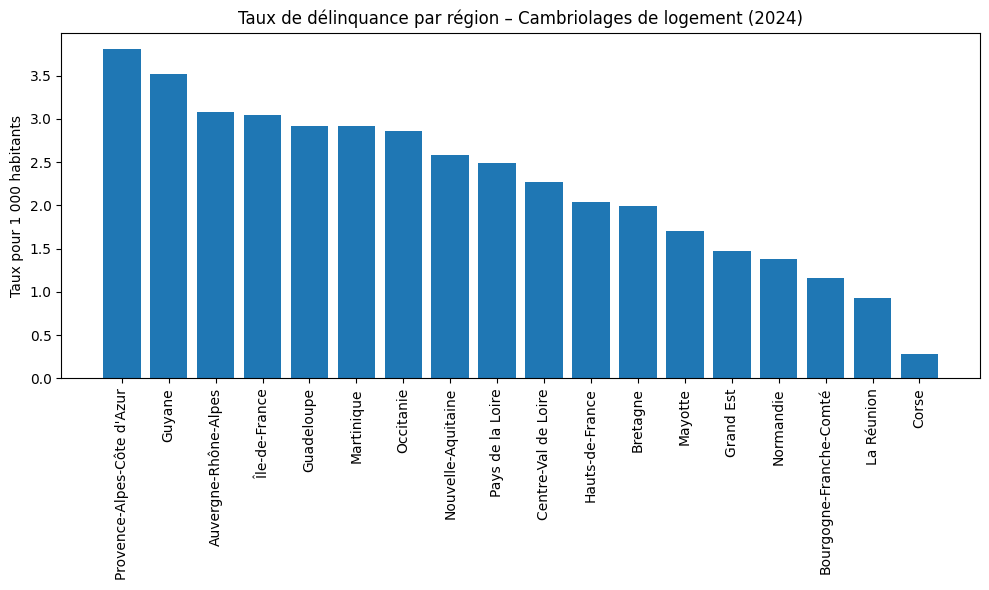

In [ ]:
#  compare les régions entre elles en termes de taux de délinquance pour un indicateur donné, 
#   sur la dernière année disponible

import matplotlib.pyplot as plt

# Paramètres de visualisation
annee_viz = df_analysis["annee"].max()
indicateur_viz = df_analysis["indicateur"].unique()[0]

df_region = (
    df_analysis[
        (df_analysis["annee"] == annee_viz) &
        (df_analysis["indicateur"] == indicateur_viz)
    ]
    .groupby("nom_region", as_index=False)
    .agg(
        faits=("nombre", "sum"),
        population=("insee_pop", "sum")
    )
)

df_region["taux_region_pour_mille"] = df_region["faits"] / df_region["population"] * 1000
df_region = df_region.sort_values("taux_region_pour_mille", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_region["nom_region"], df_region["taux_region_pour_mille"])
plt.xticks(rotation=90)
plt.ylabel("Taux pour 1 000 habitants")
plt.title(f"Taux de délinquance par région – {indicateur_viz} ({annee_viz})")
plt.tight_layout()
plt.show()


### 3.2 Taux de délinquance par département

L’analyse est ensuite menée à l’échelle départementale, permettant une lecture plus fine tout en limitant l’instabilité des taux observée à l’échelle communale.


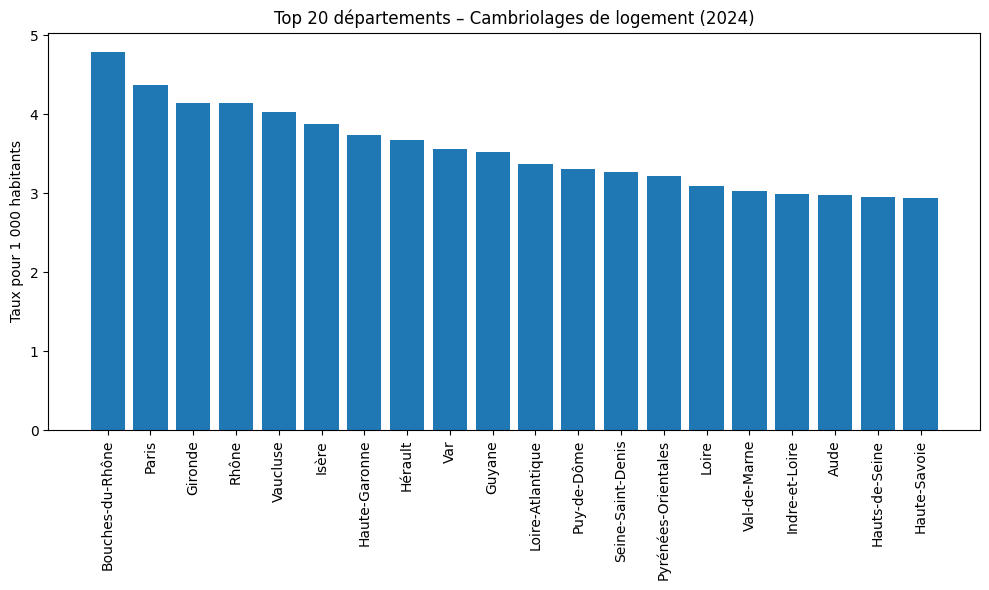

,nom_departement,faits,population,taux_dep_pour_mille
12,Bouches-du-Rhône,9911.0,2069811,4.788360
76,Paris,9235.0,2113705,4.369105
33,Gironde,6939.0,1674980,4.142736
81,Rhône,7894.0,1907982,4.137356
95,Vaucluse,2293.0,568702,4.031989
51,Isère,5008.0,1291380,3.878022
38,Haute-Garonne,5439.0,1456261,3.734907
47,Hérault,4471.0,1217331,3.672789
94,Var,3950.0,1108364,3.563811
35,Guyane,1015.0,288382,3.519637


In [ ]:
#  identifie et visualise les 20 départements les plus touchés par un indicateur de délinquance, 
#  en rapportant les faits à la population pour obtenir un taux comparable


df_dep = (
    df_analysis[
        (df_analysis["annee"] == annee_viz) &
        (df_analysis["indicateur"] == indicateur_viz)
    ]
    .groupby("nom_departement", as_index=False)
    .agg(
        faits=("nombre", "sum"),
        population=("insee_pop", "sum")
    )
)

df_dep["taux_dep_pour_mille"] = df_dep["faits"] / df_dep["population"] * 1000
df_dep = df_dep.sort_values("taux_dep_pour_mille", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.bar(df_dep["nom_departement"], df_dep["taux_dep_pour_mille"])
plt.xticks(rotation=90)
plt.ylabel("Taux pour 1 000 habitants")
plt.title(f"Top 20 départements – {indicateur_viz} ({annee_viz})")
plt.tight_layout()
plt.show()

df_dep


### 3.3 Par communes

Afin d’illustrer la variabilité des taux à l’échelle locale, un focus est proposé sur les communes d’un département donné.


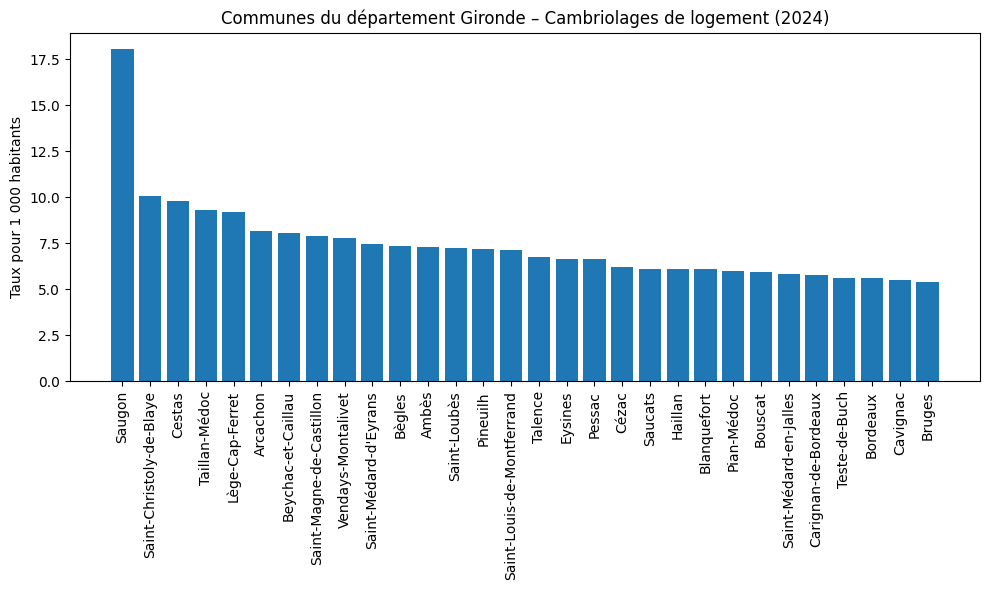

,nom_commune,taux_calcule_pour_mille,insee_pop
1723013,Saugon,18.036072,499
1707758,Saint-Christoly-de-Blaye,10.058232,1889
1673873,Cestas,9.786955,16757
1725308,Taillan-Médoc,9.301477,10966
1689128,Lège-Cap-Ferret,9.191405,8051
1659293,Arcachon,8.168885,10895
1664558,Beychac-et-Caillau,8.052147,2608
1714778,Saint-Magne-de-Castillon,7.910656,2149
1728143,Vendays-Montalivet,7.801418,2820
1716263,Saint-Médard-d'Eyrans,7.438262,3361


In [ ]:
#  Identifie et visualise les 30 communes les plus touchées d’un département donné

departement_viz = df_dep.iloc[2]["nom_departement"]

df_commune = df_analysis[
    (df_analysis["annee"] == annee_viz) &
    (df_analysis["indicateur"] == indicateur_viz) &
    (df_analysis["nom_departement"] == departement_viz)
].copy()

df_commune = df_commune.sort_values("taux_calcule_pour_mille", ascending=False).head(30)

plt.figure(figsize=(10, 6))
plt.bar(df_commune["nom_commune"], df_commune["taux_calcule_pour_mille"])
plt.xticks(rotation=90)
plt.ylabel("Taux pour 1 000 habitants")
plt.title(
    f"Communes du département {departement_viz} – {indicateur_viz} ({annee_viz})"
)
plt.tight_layout()
plt.show()

df_commune[["nom_commune", "taux_calcule_pour_mille", "insee_pop"]]


### 3.4 Répartition des infractions par grande catégorie

Cette visualisation présente la distribution des infractions par grande catégorie, afin de donner une vue d’ensemble de la structure de la délinquance observée pour une année donnée.


In [ ]:
# Paramètres
# calcule la répartition des faits par grandes catégories de délinquance pour la dernière année disponible, 
# en agrégeant les indicateurs détaillés

annee_viz = df_analysis["annee"].max()

df_cat_dist = (
    df_analysis[df_analysis["annee"] == annee_viz]
    .groupby("categorie_indicateur", as_index=False)
    .agg(faits=("nombre", "sum"))
)

df_cat_dist


,categorie_indicateur,faits
0,Atteintes aux biens,1165903.0
1,Atteintes aux personnes,764439.0
2,Infractions économiques,393437.0
3,Stupéfiants,580098.0
4,Violences,499825.0


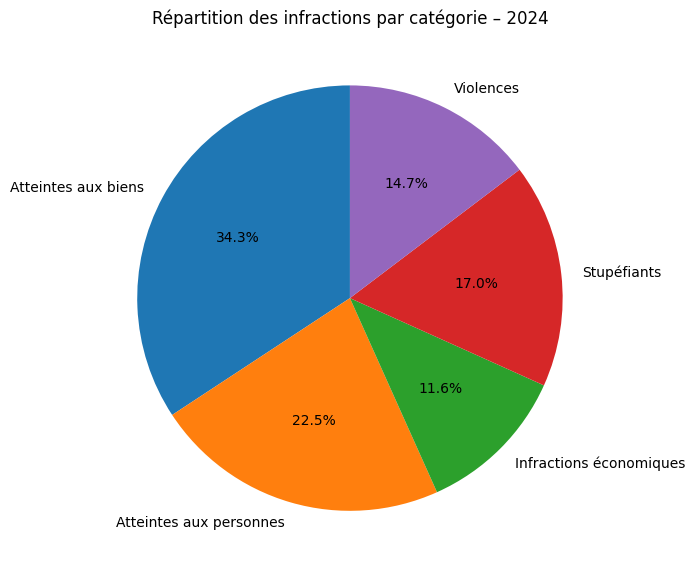

In [ ]:
#  Met en évidence la part relative de chaque catégorie d’infractions dans l’ensemble des faits pour l’année choisie

plt.figure(figsize=(7, 7))

plt.pie(
    df_cat_dist["faits"],
    labels=df_cat_dist["categorie_indicateur"],
    autopct="%1.1f%%",
    startangle=90
)

plt.title(f"Répartition des infractions par catégorie – {annee_viz}")
plt.tight_layout()
plt.show()


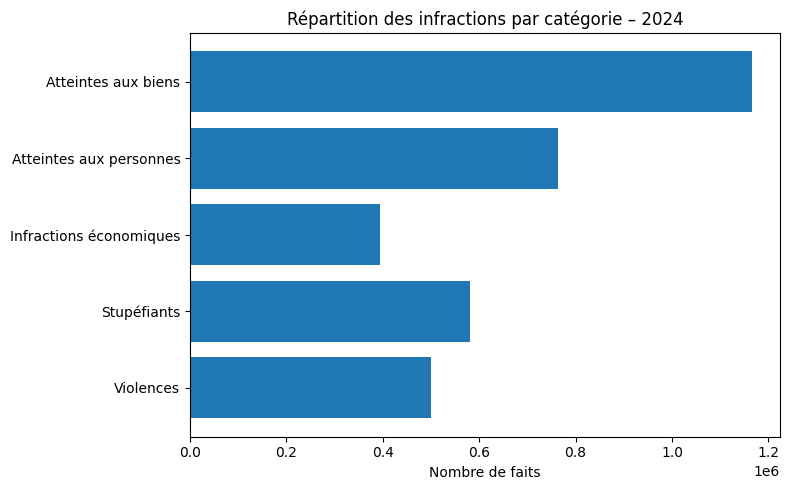

In [ ]:
# représente une catégorie d’infractions
# avec sa longueur proportionnelle au nombre de faits
# La catégorie la plus importante apparaît en haut
plt.figure(figsize=(8, 5))
plt.barh(
    df_cat_dist["categorie_indicateur"],
    df_cat_dist["faits"]
)
plt.xlabel("Nombre de faits")
plt.title(f"Répartition des infractions par catégorie – {annee_viz}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 3.5 Répartition des sous-catégories au sein de chaque grande catégorie

Afin d’affiner l’analyse, la distribution des infractions est étudiée au sein de chaque grande catégorie, en distinguant les sous-catégories correspondant aux indicateurs détaillés.


In [ ]:
# ce code extrait les données de l’année la plus récente et calcule, par catégorie et indicateur, le nombre total de faits


annee_viz = df_analysis["annee"].max()

df_subcat = (
    df_analysis[df_analysis["annee"] == annee_viz]
    .groupby(["categorie_indicateur", "indicateur"])["nombre"]
    .sum()
    .reset_index(name="faits")
)

df_subcat.head()



/var/folders/lq/12fzlg457fvcn5331txcwkdr0000gn/T/ipykernel_52464/62541144.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["categorie_indicateur", "indicateur"])["nombre"]


,categorie_indicateur,indicateur,faits
0,Atteintes aux biens,Cambriolages de logement,186989.0
1,Atteintes aux biens,Destructions et dégradations volontaires,513110.0
2,Atteintes aux biens,Escroqueries et fraudes aux moyens de paiement,0.0
3,Atteintes aux biens,Trafic de stupéfiants,0.0
4,Atteintes aux biens,Usage de stupéfiants,0.0


In [54]:
df_analysis[["indicateur", "categorie_indicateur"]].drop_duplicates().sort_values("categorie_indicateur")


,indicateur,categorie_indicateur
0,Cambriolages de logement,Atteintes aux biens
9,Destructions et dégradations volontaires,Atteintes aux biens
90,Vols d'accessoires sur véhicules,Atteintes aux biens
99,Vols dans les véhicules,Atteintes aux biens
108,Vols de véhicule,Atteintes aux biens
81,Vols avec armes,Atteintes aux personnes
117,Vols sans violence contre des personnes,Atteintes aux personnes
126,Vols violents sans arme,Atteintes aux personnes
18,Escroqueries et fraudes aux moyens de paiement,Infractions économiques
27,Trafic de stupéfiants,Stupéfiants


In [ ]:
# Regroupe par catégorie et indicateur, calcule la somme des faits (nombre), puis trie les résultats par catégorie et par faits décroissants.

annee_viz = df_analysis["annee"].max()

df_subcat = (
    df_analysis[df_analysis["annee"] == annee_viz]
    .groupby(["categorie_indicateur", "indicateur"])["nombre"]
    .sum()
    .reset_index(name="faits")
)

df_subcat.sort_values(["categorie_indicateur", "faits"], ascending=[True, False]).head(30)


/var/folders/lq/12fzlg457fvcn5331txcwkdr0000gn/T/ipykernel_52464/2797280163.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["categorie_indicateur", "indicateur"])["nombre"]


,categorie_indicateur,indicateur,faits
1,Atteintes aux biens,Destructions et dégradations volontaires,513110.0
11,Atteintes aux biens,Vols dans les véhicules,264220.0
0,Atteintes aux biens,Cambriolages de logement,186989.0
12,Atteintes aux biens,Vols de véhicule,121697.0
10,Atteintes aux biens,Vols d'accessoires sur véhicules,79887.0
2,Atteintes aux biens,Escroqueries et fraudes aux moyens de paiement,0.0
3,Atteintes aux biens,Trafic de stupéfiants,0.0
4,Atteintes aux biens,Usage de stupéfiants,0.0
5,Atteintes aux biens,Usage de stupéfiants (AFD),0.0
6,Atteintes aux biens,Violences physiques hors cadre familial,0.0


In [56]:
annee_viz = df_analysis["annee"].max()
categorie_viz = "Atteintes aux biens"  # à changer



In [ ]:
# Extrait les indicateurs d’une catégorie donnée pour l’année la plus récente, calcule le nombre total de faits par indicateur, et élimine ceux qui n’ont pas de faits


df_cat = (
    df_analysis[
        (df_analysis["annee"] == annee_viz) &
        (df_analysis["categorie_indicateur"] == categorie_viz)
    ]
    .groupby("indicateur")["nombre"]
    .sum()
    .reset_index(name="faits")
)
df_cat = df_cat[df_cat["faits"] > 0]



/var/folders/lq/12fzlg457fvcn5331txcwkdr0000gn/T/ipykernel_52464/1709313105.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("indicateur")["nombre"]


In [58]:
total_faits = df_cat["faits"].sum()

df_cat["pourcentage"] = df_cat["faits"] / total_faits * 100


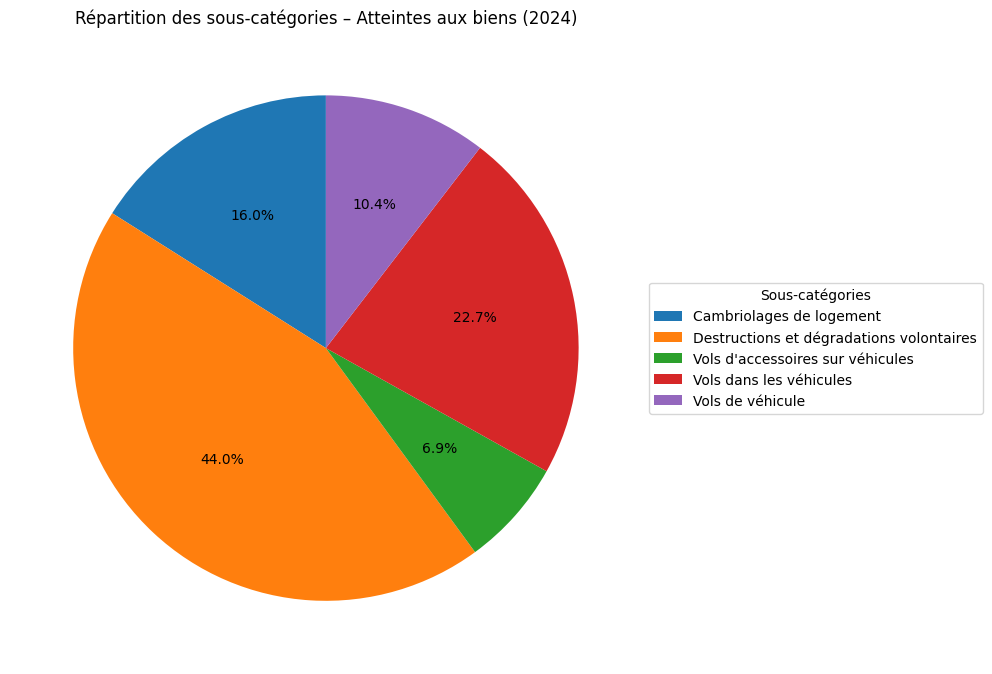

In [ ]:
# Illustre la distribution des sous‑catégories pour une catégorie donnée à l’année la plus récente
plt.figure(figsize=(10, 10))
plt.pie(
    df_cat["pourcentage"],
    autopct="%1.1f%%",
    startangle=90
)

plt.legend(
    df_cat["indicateur"],
    title="Sous-catégories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Répartition des sous-catégories – {categorie_viz} ({annee_viz})")
plt.tight_layout()
plt.show()


### 3.5 Relation entre urbanisation et délinquance

Une analyse exploratoire est menée afin d’étudier la relation entre le nombre de logements par habitant (indicateur indirect d’urbanisation) et le taux de délinquance.


In [ ]:
# mesure la relation linéaire entre le nombre de logements par habitant 
# et le taux de délinquance pour 1 000 habitants

df_corr = df_analysis[
    (df_analysis["logements_par_habitant"].notna()) &
    (df_analysis["taux_calcule_pour_mille"].notna())
]

corr_pearson = df_corr["logements_par_habitant"].corr(
    df_corr["taux_calcule_pour_mille"]
)

corr_pearson


np.float64(0.0201647944855194)

La corrélation de Pearson entre le ratio logements par habitant et le taux de délinquance est très proche de zéro (r ≈ 0,02), indiquant l’absence de relation linéaire significative entre ces deux variables. Ce résultat est cohérent avec la forte hétérogénéité territoriale des communes.


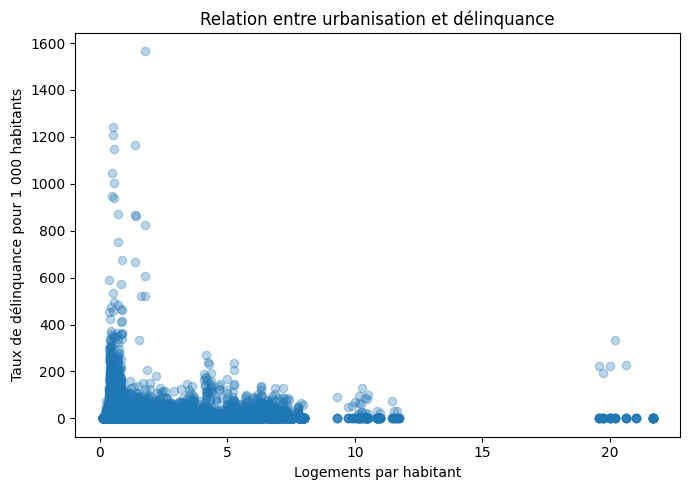

In [ ]:
# Permet de mesurer la correlation entre entre urbanisation (logements par habitant) et délinquance (taux pour 1 000 habitants)

plt.figure(figsize=(7, 5))
plt.scatter(
    df_corr["logements_par_habitant"],
    df_corr["taux_calcule_pour_mille"],
    alpha=0.3
)

plt.xlabel("Logements par habitant")
plt.ylabel("Taux de délinquance pour 1 000 habitants")
plt.title("Relation entre urbanisation et délinquance")
plt.tight_layout()
plt.show()


Le nuage de points met en évidence une forte dispersion des taux pour les communes les moins peuplées. 
Ce phénomène s’explique par un effet mécanique lié au faible dénominateur utilisé dans le calcul des taux.
Afin de limiter cet aléa statistique, l’analyse est privilégiée par classes de communes et à des niveaux territoriaux plus agrégés.


/var/folders/lq/12fzlg457fvcn5331txcwkdr0000gn/T/ipykernel_52464/595169515.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("taille_commune")


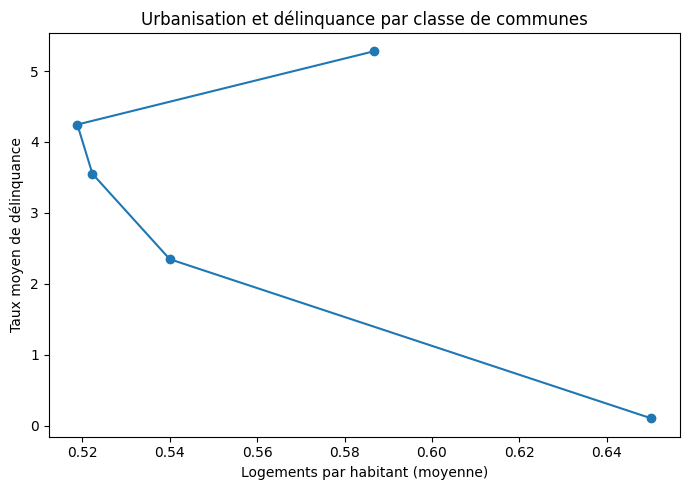

,taille_commune,taux_moyen,logements_par_habitant
0,<1k,0.101600,0.650172
1,1k–5k,2.346607,0.540021
2,5k–20k,3.550925,0.522332
3,20k–100k,4.245371,0.518885
4,>100k,5.280029,0.586802


In [ ]:
#calcule et visualise la relation entre urbanisation (logements par habitant) et délinquance (taux moyen) 
# en fonction de la taille des communes


df_corr_classe = (
    df_analysis
    .groupby("taille_commune")
    .agg(
        taux_moyen=("taux_calcule_pour_mille", "mean"),
        logements_par_habitant=("logements_par_habitant", "mean")
    )
    .reset_index()
)

plt.figure(figsize=(7, 5))
plt.plot(
    df_corr_classe["logements_par_habitant"],
    df_corr_classe["taux_moyen"],
    marker="o"
)

plt.xlabel("Logements par habitant (moyenne)")
plt.ylabel("Taux moyen de délinquance")
plt.title("Urbanisation et délinquance par classe de communes")
plt.tight_layout()
plt.show()

df_corr_classe


In [ ]:
# calcule un tableau synthétique qui relie la taille des communes à deux indicateurs moyens 
# le taux de délinquance
#  le niveau d’urbanisation (logements par habitant)


df_corr_classe = (
    df_analysis
    .groupby("taille_commune")
    .agg(
        taux_moyen=("taux_calcule_pour_mille", "mean"),
        logements_par_habitant=("logements_par_habitant", "mean")
    )
    .reset_index()
)


/var/folders/lq/12fzlg457fvcn5331txcwkdr0000gn/T/ipykernel_52464/1505099073.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("taille_commune")


La corrélation de Pearson n’ayant pas mis en évidence de relation linéaire significative entre les variables étudiées, une analyse par tailles de communes a été privilégiée afin d’explorer des effets structurels liés à la taille des territoires.


In [64]:
df_class = df_analysis[
    (df_analysis["taux_calcule_pour_mille"].notna()) &
    (df_analysis["taille_commune"].notna())
].copy()


In [65]:
df_class.groupby("taille_commune")["taux_calcule_pour_mille"].agg(
    moyenne="mean",
    mediane="median",
    nb_obs="count"
)


/var/folders/lq/12fzlg457fvcn5331txcwkdr0000gn/T/ipykernel_52464/1354827793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_class.groupby("taille_commune")["taux_calcule_pour_mille"].agg(


,moyenne,mediane,nb_obs
taille_commune,,,
<1k,0.101600,0.000000,1930661
1k–5k,2.346607,0.000000,376843
5k–20k,3.550925,2.655486,165623
20k–100k,4.245371,2.814729,58751
>100k,5.280029,3.164557,7145


<Figure size 1000x600 with 0 Axes>

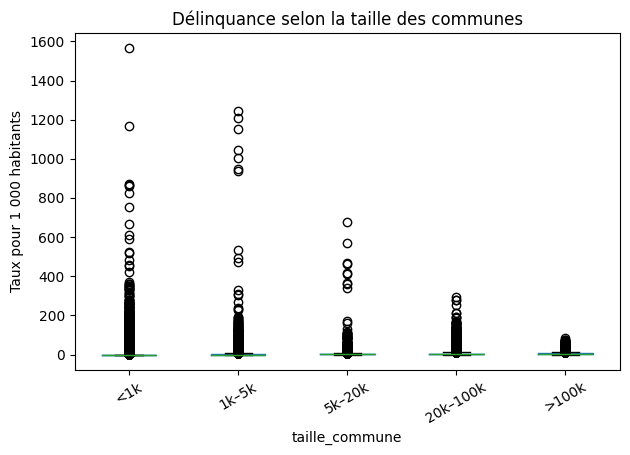

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_class.boxplot(
    column="taux_calcule_pour_mille",
    by="taille_commune",
    grid=False,
    rot=30
)
plt.ylabel("Taux pour 1 000 habitants")
plt.title("Délinquance selon la taille des communes")
plt.suptitle("")
plt.tight_layout()
plt.show()


La dispersion des taux est nettement plus élevée dans les petites communes, en raison des faibles effectifs et d’un fort aléa statistique. 
À l’inverse, les grandes communes présentent des distributions beaucoup plus homogènes, traduisant une plus grande stabilité des indicateurs.


### 3.6 Évolution temporelle par grande catégorie d’infraction

Afin d’analyser les tendances de long terme, l’évolution annuelle des taux de délinquance est étudiée pour chaque grande catégorie d’infraction.  
Les faits et les populations sont agrégés par année avant le recalcul des taux, afin de limiter l’aléa statistique.


In [ ]:
# produit une série temporelle par catégorie d’infractions, avec un taux standardisé pour 1 000 habitants. 
# C’est une base idéale pour tracer des courbes d’évolution et comparer les tendances des différentes catégories au fil des années
df_evol_cat = (
    df_analysis
    .groupby(["annee", "categorie_indicateur"], as_index=False)
    .agg(
        faits=("nombre", "sum"),
        population=("insee_pop", "sum")
    )
)

df_evol_cat["taux_pour_mille"] = (
    df_evol_cat["faits"] / df_evol_cat["population"] * 1000
)

df_evol_cat.head()


,annee,categorie_indicateur,faits,population,taux_pour_mille
0,2016,Atteintes aux biens,1361834.0,350932045,3.880620
1,2016,Atteintes aux personnes,959490.0,210559227,4.556865
2,2016,Infractions économiques,237517.0,70186409,3.384088
3,2016,Stupéfiants,204892.0,210559227,0.973085
4,2016,Violences,289416.0,210559227,1.374511


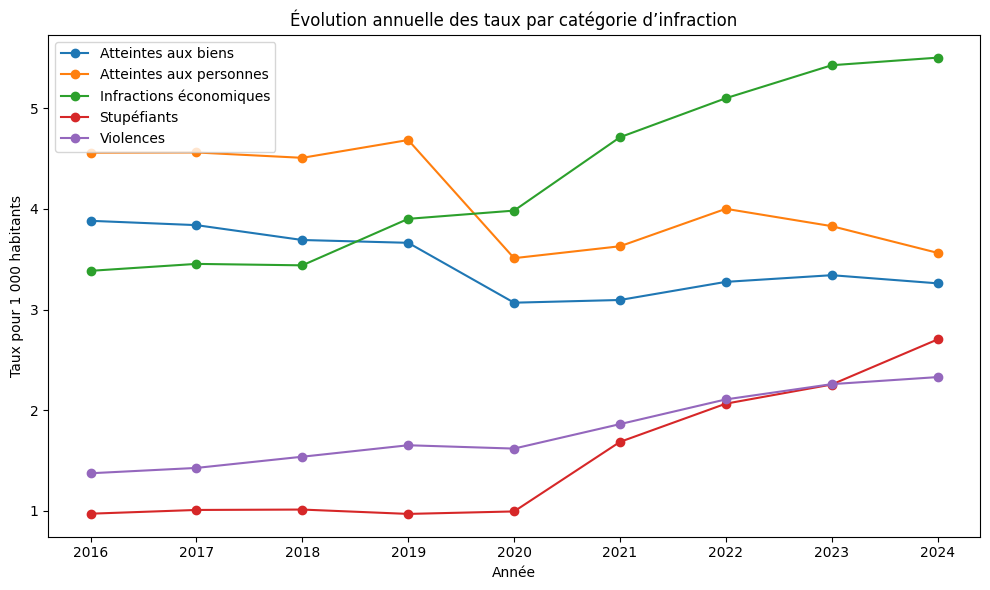

In [ ]:
# Produit un line plot multi‑courbes qui montre l’évolution annuelle des taux de délinquance par catégorie. 
# chaque catégorie est représentée par une courbe distincte, ce qui permet de comparer leurs tendances dans le temps
plt.figure(figsize=(10, 6))

for categorie in df_evol_cat["categorie_indicateur"].unique():
    df_tmp = df_evol_cat[df_evol_cat["categorie_indicateur"] == categorie]
    plt.plot(
        df_tmp["annee"],
        df_tmp["taux_pour_mille"],
        marker="o",
        label=categorie
    )

plt.xlabel("Année")
plt.ylabel("Taux pour 1 000 habitants")
plt.title("Évolution annuelle des taux par catégorie d’infraction")
plt.legend()
plt.tight_layout()
plt.show()


### 3.7 Évolution temporelle des taux par région

Cette analyse vise à comparer l’évolution annuelle des taux de délinquance entre les différentes régions.  
Les faits et la population sont


In [ ]:
# Ce graphique permet de comparer les trajectoires régionales de la délinquance dans le temps, 
# en mettant en évidence les différences de niveau et de tendance entre territoires


df_evol_reg = (
    df_analysis
    .groupby(["annee", "nom_region"], as_index=False)
    .agg(
        faits=("nombre", "sum"),
        population=("insee_pop", "sum")
    )
)

df_evol_reg["taux_pour_mille"] = (
    df_evol_reg["faits"] / df_evol_reg["population"] * 1000
)

df_evol_reg.head()


,annee,nom_region,faits,population,taux_pour_mille
0,2016,Auvergne-Rhône-Alpes,294594.0,118753335,2.480722
1,2016,Bourgogne-Franche-Comté,64838.0,42275070,1.533717
2,2016,Bretagne,84595.0,49597935,1.705615
3,2016,Centre-Val de Loire,67848.0,38667990,1.754630
4,2016,Corse,8795.0,4956825,1.774321


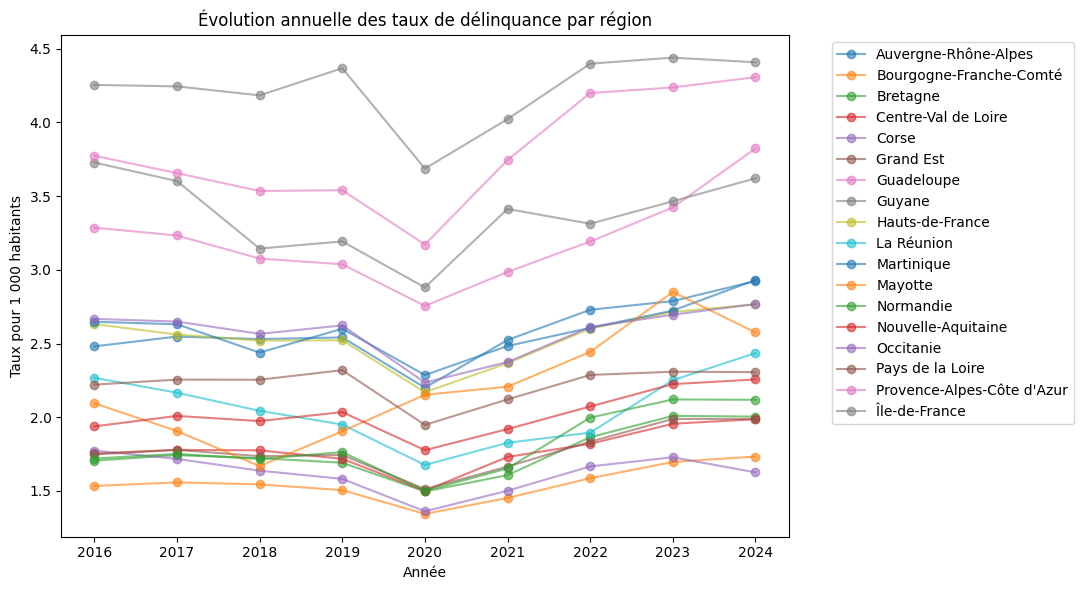

In [ ]:
# l’évolution annuelle du taux de délinquance par région

plt.figure(figsize=(11, 6))

for region in df_evol_reg["nom_region"].unique():
    df_tmp = df_evol_reg[df_evol_reg["nom_region"] == region]
    plt.plot(
        df_tmp["annee"],
        df_tmp["taux_pour_mille"],
        marker="o",
        alpha=0.6,
        label=region
    )

plt.xlabel("Année")
plt.ylabel("Taux pour 1 000 habitants")
plt.title("Évolution annuelle des taux de délinquance par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### 3.6 Évolution temporelle par région et par catégorie d’infraction

Cette analyse vise à comparer les trajectoires régionales pour chaque grande catégorie d’infraction.  
Les faits et la population sont agrégés par région, par catégorie et par année avant le recalcul des taux, afin de garantir la comparabilité des résultats.


In [ ]:
# Produit une série temporelle multi‑dimensionnelle :
# parr année,
# par région,
# par catégorie d’infraction

df_evol_reg_cat = (
    df_analysis
    .groupby(["annee", "nom_region", "categorie_indicateur"], as_index=False)
    .agg(
        faits=("nombre", "sum"),
        population=("insee_pop", "sum")
    )
)

df_evol_reg_cat["taux_pour_mille"] = (
    df_evol_reg_cat["faits"] / df_evol_reg_cat["population"] * 1000
)

df_evol_reg_cat.head()


,annee,nom_region,categorie_indicateur,faits,population,taux_pour_mille
0,2016,Auvergne-Rhône-Alpes,Atteintes aux biens,148983.0,39584445,3.763675
1,2016,Auvergne-Rhône-Alpes,Atteintes aux personnes,78610.0,23750667,3.309802
2,2016,Auvergne-Rhône-Alpes,Infractions économiques,22273.0,7916889,2.813353
3,2016,Auvergne-Rhône-Alpes,Stupéfiants,19233.0,23750667,0.809788
4,2016,Auvergne-Rhône-Alpes,Violences,25495.0,23750667,1.073444


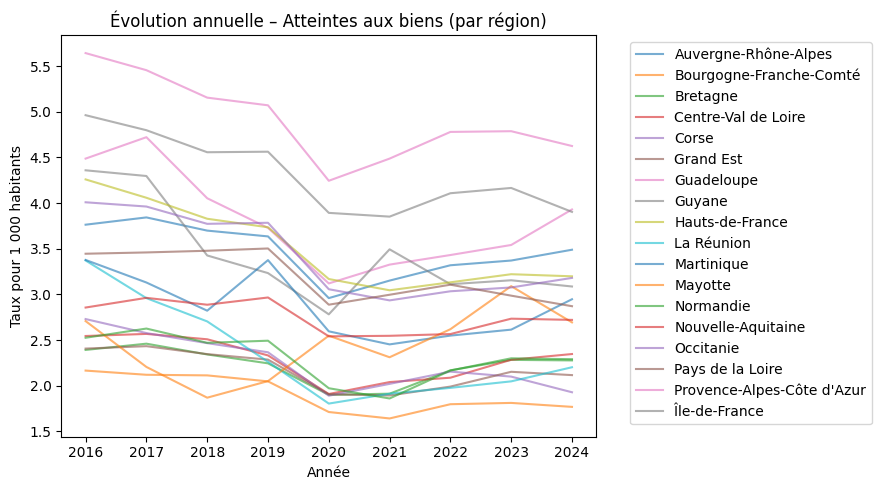

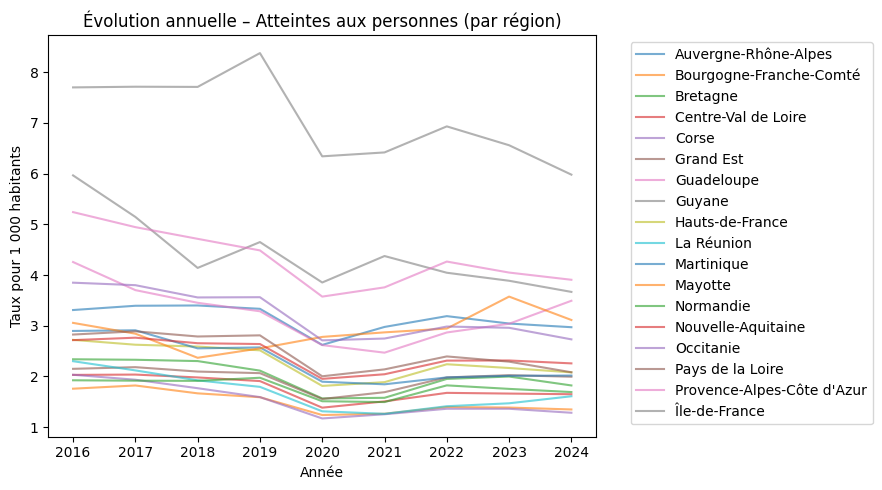

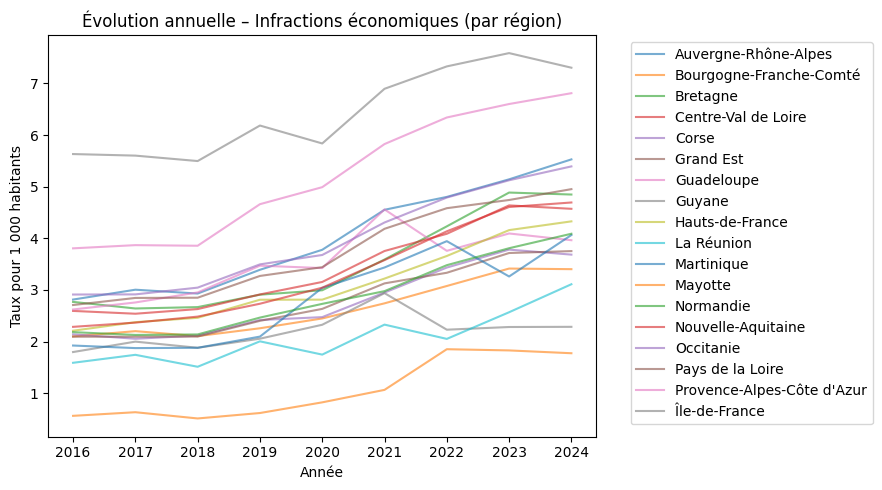

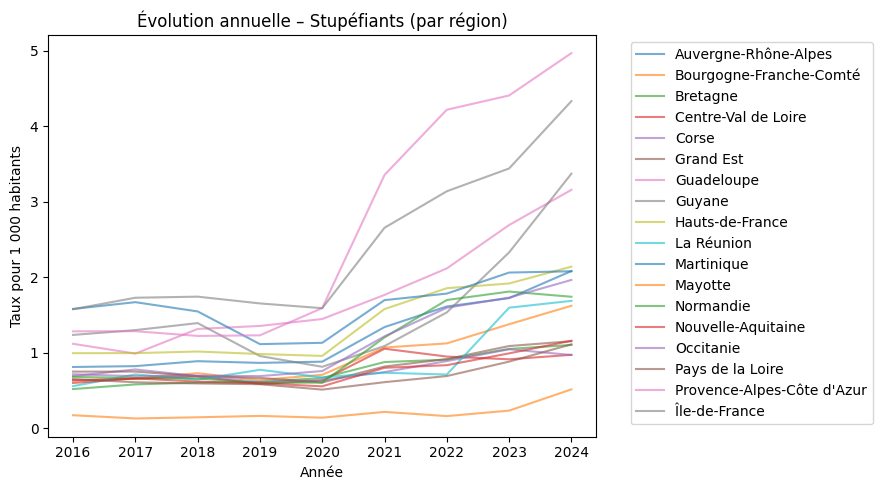

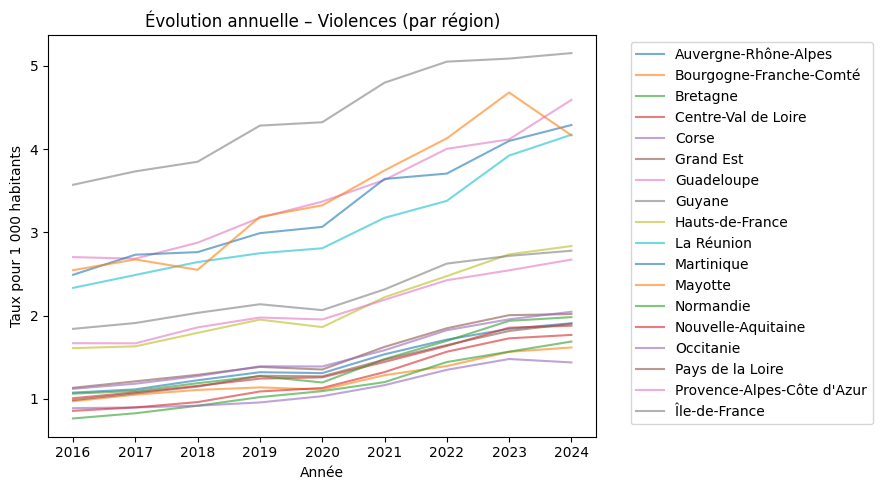

In [ ]:
# Collection de line plots :
# Chaque graphique correspond à une catégorie d’infraction
# Chaque courbe dans le graphique correspond à une région
# Cela permet de comparer les trajectoires régionales pour chaque type d’infraction au fil des années


categories = df_evol_reg_cat["categorie_indicateur"].unique()

for categorie in categories:
    plt.figure(figsize=(9, 5))
    
    df_cat = df_evol_reg_cat[df_evol_reg_cat["categorie_indicateur"] == categorie]
    
    for region in df_cat["nom_region"].unique():
        df_tmp = df_cat[df_cat["nom_region"] == region]
        plt.plot(
            df_tmp["annee"],
            df_tmp["taux_pour_mille"],
            alpha=0.6,
            label=region
        )
    
    plt.xlabel("Année")
    plt.ylabel("Taux pour 1 000 habitants")
    plt.title(f"Évolution annuelle – {categorie} (par région)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


L’analyse met en évidence des dynamiques régionales différenciées selon les catégories d’infractions.  
Certaines catégories présentent des évolutions relativement homogènes entre régions, tandis que d’autres révèlent des trajectoires plus contrastées.
Ces résultats s’inscrivent dans une approche descriptive et doivent être interprétés avec prudence.


In [ ]:
# Calcule la variation annuelle du taux de délinquance par région, 
# ce qui te permet de suivre les hausses et baisses d’une année sur l’autre

df_evol_reg["variation"] = (
    df_evol_reg
    .groupby("nom_region")["taux_pour_mille"]
    .diff()
)


In [74]:
df_evol_reg = df_evol_reg.sort_values(
    ["nom_region", "annee"]
)


### Évolution du taux de délinquance par région

Cette visualisation permet d’observer l’évolution temporelle du taux pour mille habitants au niveau régional.


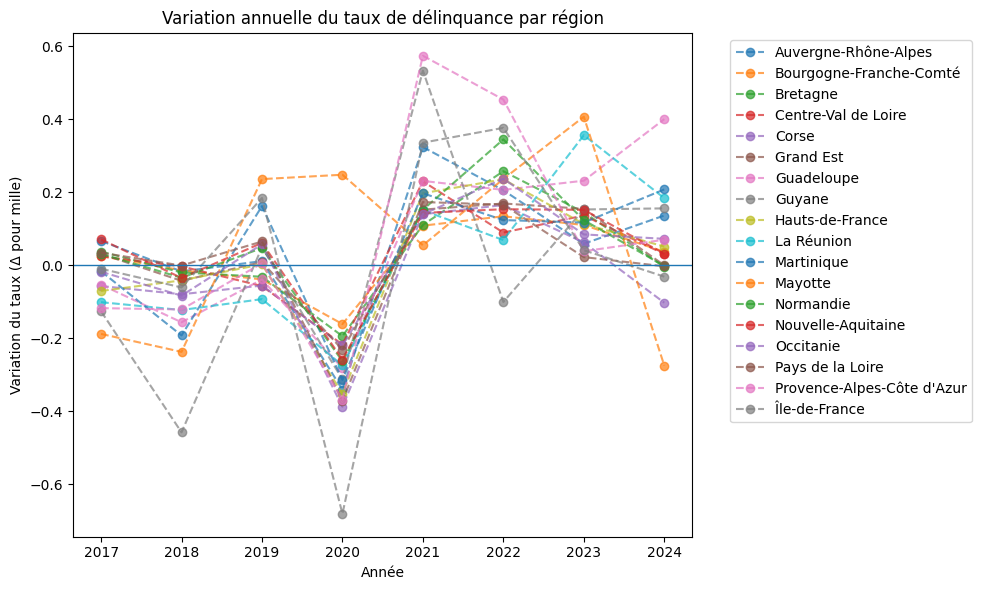

In [ ]:
# Montre l’évolution annuelle de la variation du taux de délinquance pour chaque région, permettant de comparer visuellement les tendances régionales

df_var = df_evol_reg[df_evol_reg["variation"].notna()]

plt.figure(figsize=(10, 6))

for region in df_var["nom_region"].unique():
    df_r = df_var[df_var["nom_region"] == region]
    plt.plot(
        df_r["annee"],
        df_r["variation"],
        marker="o",
        linestyle="--",
        alpha=0.7,
        label=region
    )

plt.axhline(0, linewidth=1)
plt.xlabel("Année")
plt.ylabel("Variation du taux (Δ pour mille)")
plt.title("Variation annuelle du taux de délinquance par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Les variations annuelles du taux de délinquance montrent des évolutions globalement modérées et synchrones entre les régions, avec une rupture marquée en 2020 (crise de la COVID-19) suivie d’un rebond en 2021, puis une stabilisation progressive.
